# Udacity - SDCND Project : Traffic sign classifier
- ## deep leanrning 

## Implement Traffic_Sign_Classifier using LeNet of the CNN architecture

# Step 1 - Load The Data

In [1]:
import pickle

training_file = '/home/nsslab/Downloads/traffic-signs-data/train.p'
validation_file='/home/nsslab/Downloads/traffic-signs-data/valid.p'
testing_file = '/home/nsslab/Downloads/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Step 2 - Dataset Summary & Exploratory                           Visualization

## Dataset Summary
- 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels)
- 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id

In [2]:
import numpy as np

n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation example ",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation example  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize Data

- Visualize training images on each class and display class number & each percentage about the total

In [4]:
import matplotlib.pyplot as plt
def plot_image(image, nr, nc, i, label=""):
       
    if i>0: 
        plt.subplot(nr, nc, i)
    else:
        plt.figure(figsize=(nr,nc))
        
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)
    plt.tight_layout()
    plt.imshow(image, cmap="gray")

    
import random
def plot_random(dataset1, dataset2=None, instances=1):

    nc = 1 if dataset2 is None else 2
    nr = instances
    #plt.figure(figsize=(nr,nc))
    for i in range(instances):
        index = random.randint(0, len(dataset1))
        plot_image(dataset1[index].squeeze(), nr, nc, 2*i+1)
        if dataset2 is not None:
            image = dataset2[index].squeeze()
            plot_image(image, nr, nc, 2*i+2)
            print("image mean=", image.mean())


from scipy import misc
def get_image_per_class(X, y):
   
    signs_left = n_classes
    class_images = [None for x in range(signs_left)]

    i = 0
    while signs_left>0:
        if class_images[y[i]] == None:
            image = X[i].squeeze()
            class_images[y[i]] = image
            signs_left -= 1
        i += 1
    return class_images


def summarize_stats(class_images, y_train, y_valid):
    
    # Create a histogram of the classes
    y_train_hist = np.bincount(y_train)
    y_valid_hist = np.bincount(y_valid)

    nr = 5; nc = 9
    plt.figure(figsize=(nr,nc))
    for image,i in zip(class_images, range(len(class_images))):
        label = (str(i) + "\n"                                            # class
              + str(y_train_hist[i]) + "\n"                               # no. of training samples
              + "{:.1f}%".format(100 * y_train_hist[i]/sum(y_train_hist))  + "\n"   # representation in training samples
              + "{:.1f}%".format(100 * y_valid_hist[i]/sum(y_valid_hist)))     # representation in validation samples
        plot_image(image, nr, nc, i+1, label)
        
class_images = get_image_per_class(X_train, y_train)
summarize_stats(class_images, y_train, y_valid)
        

/home/nsslab/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


/home/nsslab/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


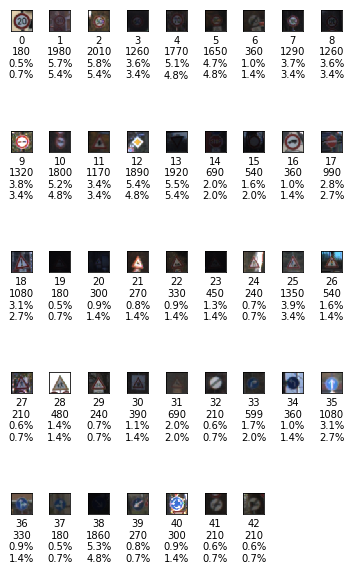

In [5]:
class_images = get_image_per_class(X_train, y_train)
summarize_stats(class_images, y_train, y_valid)

# Step 3 - Design and Train a Model Architecture
## Preprocess Data
- convert RGB images to GRAY images

 As shown in the figure below, Converting from rgb to gray allows the classifier to better recognize the sign.     
 I will show it directly through the picture.

Original image


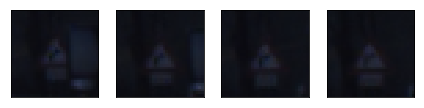

In [6]:
import matplotlib.pyplot as plt

def get_num_instances(img_class, y):
    y_hist = np.bincount(y)
    n_instances = y_hist[img_class]
    return n_instances

def get_class_images(img_class, X, y):
    n_instances = get_num_instances(img_class, y)
    class_images = []
    i = 0
    while n_instances>0:
        if y[i] == img_class:
            image = X[i].squeeze()
            class_images.append(image)
            n_instances -= 1
        i += 1
    return class_images

import math
def plot_class_images(img_class, class_images, ncol, desc):
    nimages = len(class_images)
    nrow = math.ceil(nimages/ncol)
    #plt.figure(figsize=(nrow,ncol))
    print("class {} has {} images in the {} dataset".format(img_class,nimages, desc))
    for image,i in zip(class_images, range(nimages)):
        plot_image(image, nrow, ncol, i)
    
def plot_class(img_class, X, y, ncol, desc):
    class_images = get_class_images(img_class, X, y)
    plot_class_images(img_class, class_images, ncol,  desc)
    
class_images = get_class_images(20, X_train, y_train)
print("Original image")
for i in range(4):
    plot_image(class_images[i], 1, 4, i+1)

RGB_images may look dark, but gray_images may show a sign outline

Gray image


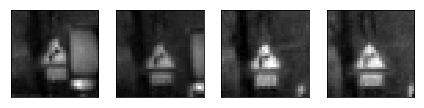

In [7]:
def rgb2gray2d(X):
    gray_img = np.dot(X, [0.299, 0.587, 0.114])
    gray_img = gray_img.reshape(len(X),32,32)
    return gray_img

dark_images = [class_images[i] for i in range(4)]
gray_img = rgb2gray2d(dark_images)
print("Gray image")
for i in range(4):
    plot_image(gray_img[i], 1, 4, i+1)

In [8]:
def gray(x):
    x = np.sum(x/3, axis=3, keepdims=True)
    x = np.sum(x/3, axis=3, keepdims=True)
    return x
X_train = gray(X_train)
X_valid = gray(X_valid)
X_test  = gray(X_test)

- Normalization the data

In [9]:
def Norm(x):
    x = x / 255
    x -= np.mean(x)
    x /= np.std(x)
    return x

X_train = Norm(X_train)
X_valid = Norm(X_valid)
X_test  = Norm(X_test)
    

- Shuffle the training data

 Randomly mix sequences of the data so that the sequence of the data does not affect learning

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

## Model Architecture

In [11]:
import tensorflow as tf
epoch = 50
batch_size = 155
from tensorflow.contrib.layers import flatten

def LeNet(x):
    #Set hyperparameter
    mn = 0
    sigma = 0.1
    
    """
    #Convolutional Layer1 input : 32*32*1 output = 28*28*10
    """
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5 ,5 ,1 ,10), mean = mn , stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    #Activation
    conv1 = tf.nn.relu(conv1)
    
    """
    #Max_pool Layer1 input : 28*28*10 output = 14*14*10
    """
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')
    
    """
    #Convolutional Layer2 input : 14*14*10 output = 10*10*25
    """
    
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5 ,5 ,10 ,25), mean = mn , stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(25))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding = 'VALID') + conv2_b
    
    #Activation
    conv2 = tf.nn.relu(conv2)
    """
    #Max_pool Layer2 input : 10*10*25 output = 5*5*25
    """
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')
    
    """
    3 #Fully connected Layer3 input = 5*5*25 = 625 output = 250
    """
    
    #Flatten input = 5*5*25 output = 625
    f_conv0 = flatten(conv2)
       
    f_w1 = tf.Variable(tf.truncated_normal(shape=(625,250), mean = mn , stddev = sigma))
    f_b1 = tf.Variable(tf.zeros(250))
    f_conv1 = tf.matmul(f_conv0, f_w1) + f_b1
    
    #Activation
    f_conv1 = tf.nn.relu(f_conv1)
    """
     Apply dropout to prevent overfitting  
     The probability that a node will be transported to the next layer is 75%
    """
    
    f_conv1 = tf.nn.dropout(f_conv1, 0.75)
    
    """
    4 #Fully connected Layer4 input = 250 output = 86
    """
    
    f_w2 = tf.Variable(tf.truncated_normal(shape=(250,86), mean = mn , stddev = sigma))
    f_b2 = tf.Variable(tf.zeros(86))
    f_conv2 = tf.matmul(f_conv1, f_w2) + f_b2
    
    #Activation
    f_conv2 = tf.nn.relu(f_conv2)
    
    """
     Apply dropout to prevent overfitting  
    """
    f_conv2 = tf.nn.dropout(f_conv2, 0.75)
    
    """
    5 #Fully connected Layer5 input = 84 output = 43
    """
    
    f_w3 = tf.Variable(tf.truncated_normal(shape=(86,43), mean = mn , stddev = sigma))
    f_b3 = tf.Variable(tf.zeros(43))
    
    """
    Finally, proccessed values mean logits
    """
    
    #Predicted output
    logits = tf.matmul(f_conv2, f_w3) + f_b3
    
    return logits

## Optimization to minimize the difference between the actual value and the predicted value

- AdamOptimizer is a kind of the stochastic gradient descent algorithm
 The optimization is performed by obtaining the gradient descent direction for some randomly selected data without obtaining the gradient descent direction of the whole data. Repeatedly doing this process can minimize the loss function more efficiently than optimizing for very large data

In [12]:
#because the final size of the batches is not constant, the first element is None
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y,43)    
#learning rate
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

Check how much the predicted and actual labels match.

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluation(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y:batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy / num_examples

## Train the model and than validate&test it

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    save_file = './save_train.ckpt'
    
    validation_accuracy_graph = []
    test_accuracy_graph = []
    train_accuracy_graph = []
    
    for i in range(epoch):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy = evaluation(X_train, y_train)
        validation_accuracy = evaluation(X_valid, y_valid)
        test_accuracy = evaluation(X_test, y_test)       
        
        validation_accuracy_graph.append(validation_accuracy)
        test_accuracy_graph.append(test_accuracy)
        train_accuracy_graph.append(train_accuracy)
        
        print("epoch {}...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
    
    #Save trained data
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, save_file)
    print("Model saved")
        

Training...

epoch 1...
Train Accuracy = 0.754
Validation Accuracy = 0.693
Test Accuracy = 0.683

epoch 2...
Train Accuracy = 0.893
Validation Accuracy = 0.822
Test Accuracy = 0.822

epoch 3...
Train Accuracy = 0.938
Validation Accuracy = 0.867
Test Accuracy = 0.863

epoch 4...
Train Accuracy = 0.961
Validation Accuracy = 0.888
Test Accuracy = 0.884

epoch 5...
Train Accuracy = 0.967
Validation Accuracy = 0.892
Test Accuracy = 0.887

epoch 6...
Train Accuracy = 0.975
Validation Accuracy = 0.897
Test Accuracy = 0.899

epoch 7...
Train Accuracy = 0.980
Validation Accuracy = 0.912
Test Accuracy = 0.905

epoch 8...
Train Accuracy = 0.984
Validation Accuracy = 0.915
Test Accuracy = 0.902

epoch 9...
Train Accuracy = 0.984
Validation Accuracy = 0.917
Test Accuracy = 0.905

epoch 10...
Train Accuracy = 0.986
Validation Accuracy = 0.919
Test Accuracy = 0.910

epoch 11...
Train Accuracy = 0.988
Validation Accuracy = 0.923
Test Accuracy = 0.910

epoch 12...
Train Accuracy = 0.989
Validation Accu

Results

The validation accuracy was about 0.95% and the test accuracy was  higher than 0.93%. This is a little better than the aim. 

- Draw a graph of all accuracies

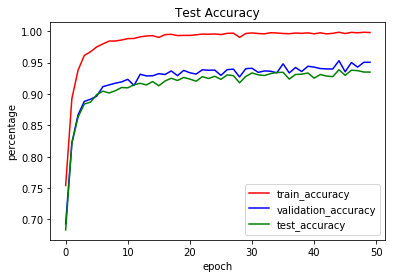

In [16]:
plt.plot(range(epoch),train_accuracy_graph,'r',label = 'train_accuracy')
plt.plot(range(epoch),validation_accuracy_graph,'b', label = 'validation_accuracy')
plt.plot(range(epoch),test_accuracy_graph,'g', label = 'test_accuracy')

plt.legend()

plt.title("Test Accuracy")
plt.xlabel('epoch')
plt.ylabel('percentage')

plt.show()

# Step4 - Test a Model on New Images

## Acquiring New Images
- New images for germany traffic signs

 Visualize new data and show structure


Shape of the New image 
(6, 32, 32, 3)


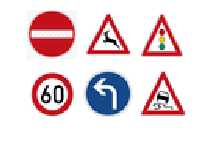

In [17]:
import glob
import matplotlib.image as mpimg
import cv2

fig, axs = plt.subplots(2,3, figsize=(3, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

new_images = []
new_images_labels = np.array([17, 31, 26, 3, 34, 23])

for i, img in enumerate(glob.glob('/home/nsslab/SDCND/Project_3/New_images/*.png')):
    
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    new_images.append(image)
    
#convert images into array to normalize the images
new_images = np.array(new_images)

print("Shape of the New image ")
print(new_images.shape)

## Performance on New Images
- Normaliza new images and test it on the trained model

Instead of learning again to distinguish the new traffic signs, reuse trained data

In [19]:
import matplotlib.pyplot as plt

"""
Gray & Normalization new data
"""
new_images = gray(new_images)
new_images = Norm(new_images)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #restore trained values
    saver.restore(sess, save_file)
       
    acr = evaluation(new_images, new_images_labels)
        
    print("new_test Accuracy = {:.3f}".format(acr))

new_test Accuracy = 1.000


## Model Certainty - Softmax Probabilities
### Output Top 5 Softmax Probabilities For Each Image Found on the Web


For each of the new images, print out the model's softmax probabilities to show the certainty of the model's predictions (limit the output to the top 5 probabilities for each image). tf.nn.top_k could prove helpful here.

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. tf.nn.top_k is used to choose the three classes with the highest probability:

(5, 6) array
 
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])

Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:

TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))

Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices.

- Apply this to new test images
 
 softmax changes the logit obtained to a probability. In other words, when there are several objects to be classified, it is a process that allows one logit to mean probability.

In [23]:
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, save_file)
    new_classes = sess.run(softmax, feed_dict={x:new_images})
    value_class = sess.run(tf.nn.top_k(new_classes, k=5, sorted=True))
print(value_class[0])
    


[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.13913226e-10   1.95684812e-19   1.99063761e-20
    1.36049259e-21]
 [  1.00000000e+00   1.16761053e-25   5.15253179e-30   8.28990355e-33
    3.21183718e-38]
 [  1.00000000e+00   9.25829878e-24   1.17986573e-24   4.63014623e-31
    2.43150318e-34]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.74434690e-17   1.31066851e-17   8.10212760e-19
    1.55679947e-20]]


- The predicted labels obtained from the highest value coincides with the actual labels.

 new_images_labels = np.array([17, 31, 26, 3, 34, 23])

In [22]:
print(value_class[1])

[[17 33 13 34 14]
 [31 21 25  5 10]
 [26 18  4  8 12]
 [ 3 11 23 28  9]
 [34 38 13  1 32]
 [23 30 11 10 20]]
